# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [2]:
import sys
sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src\\preprocessing.py'>

In [3]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

       CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
343   70.297477   0.464488        1.492598         19.884056      25.759510   
110   70.675465   0.469326        1.491887         21.103733      28.405512   
750   64.697233   0.489495        1.503128         22.472984      26.076791   
860   69.755349   0.510941        1.442396         22.027739      29.147289   
1195  66.060541   0.476166        1.459849         21.817780      25.444541   

      CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
343       0.454691     3.390609         2.508148     57.632076   
110       0.449427     3.286139         2.471432     55.340336   
750       0.434843     3.656807         2.504867     56.789223   
860       0.472229     3.025516         2.253797     60.983655   
1195      0.480637     3.367732         2.542557     55.455175   

      OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
343          80.527688         4.531202            47

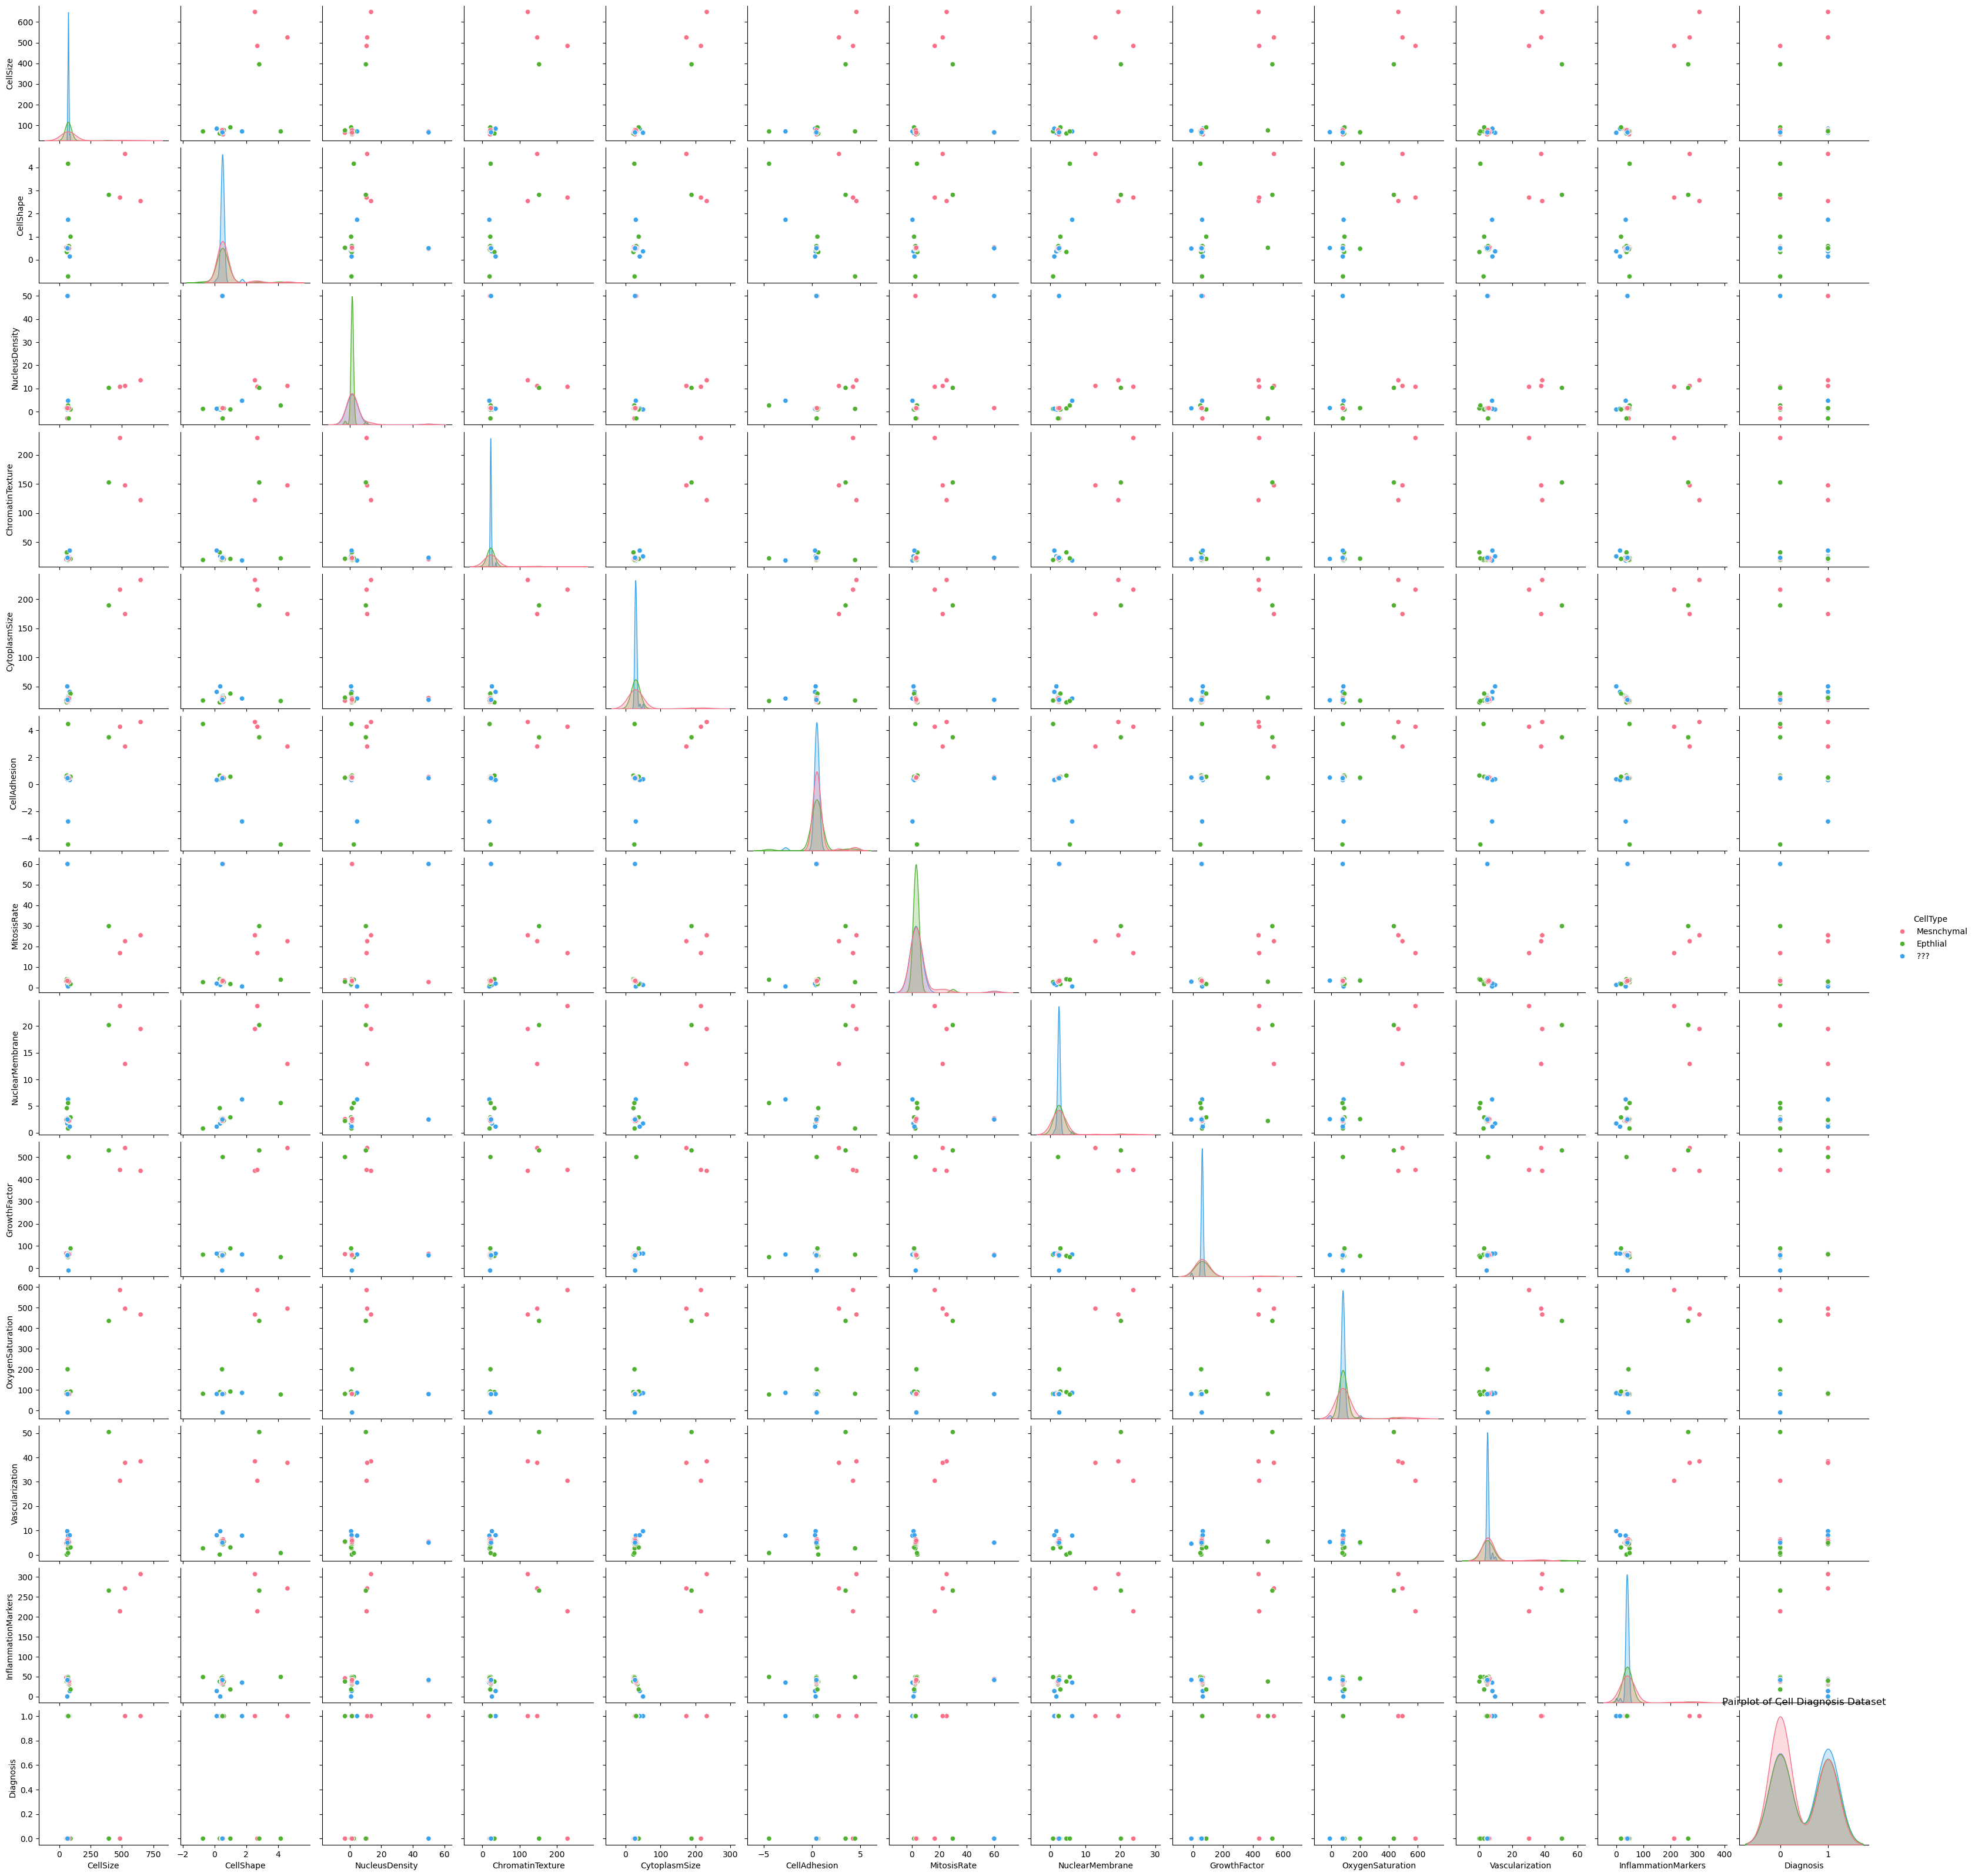

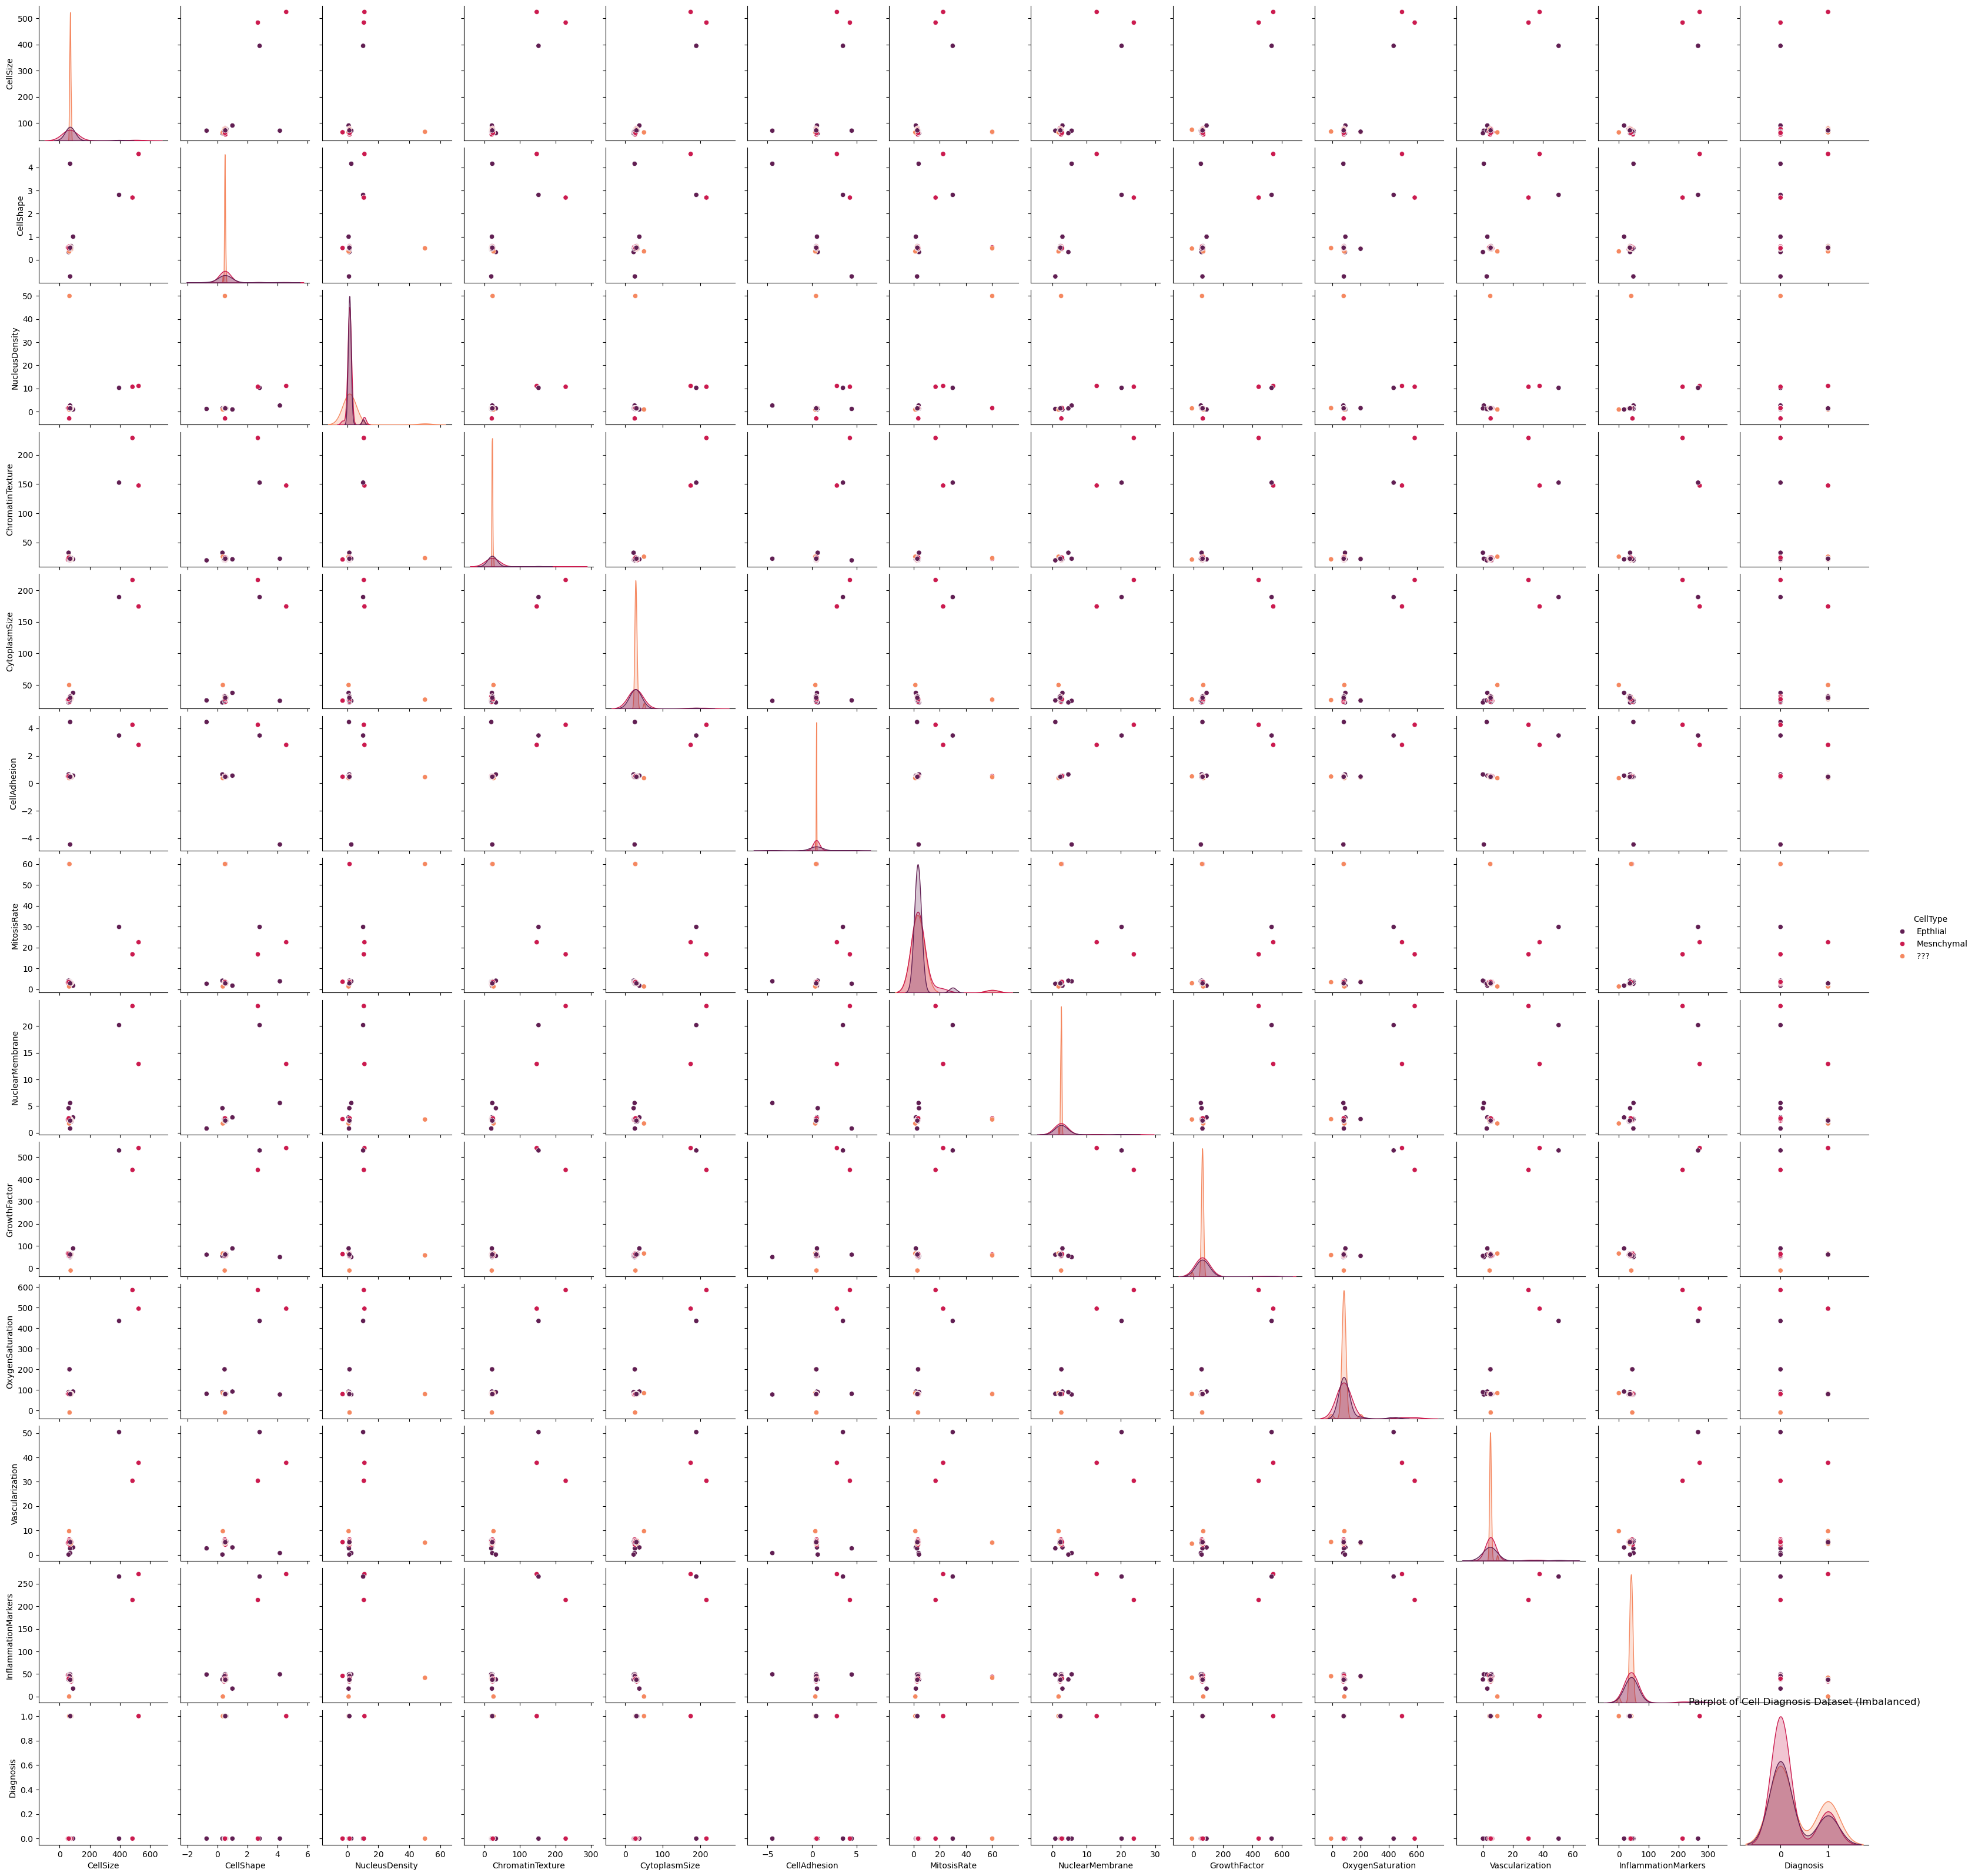

In [7]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

# hacemos un pairplot para ver la distribucion de los datos
sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
plt.title('Pairplot of Cell Diagnosis Dataset')
plt.show()

sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
plt.show()

In [5]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)
# sacamos los nan
# cell_diagnosis_dev_imbalanced = pp.fix_df(cell_diagnosis_dev_imbalanced)
# cell_diagnosis_dev = pp.fix_df(cell_diagnosis_dev)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)
# # hacemos KNN para sacar los cell type que estan como "???"
# cellType_x, cellType_y, features_ct, cellType_predict_X, cellType_predict_y, diagnosis, features_names = pp.prepare_for_knn_cell_type(cell_diagnosis_dev)
# knn_cell_type = mod.KNNClassifier(cellType_x, cellType_y, features_ct, 5)
# prediction_cellType = knn_cell_type.predict(cellType_predict_X)

# new_df_dev = pp.reunite_cell_type(cellType_x, cellType_y, cellType_predict_X, prediction_cellType, diagnosis, features_names)

# cellType_x, cellType_y, features_ct, cellType_predict_X, cellType_predict_y, diagnosis, features_names = pp.prepare_for_knn_cell_type(cell_diagnosis_dev_imbalanced)
# knn_cell_type = mod.KNNClassifier(cellType_x, cellType_y, features_ct, 5)
# prediction_cellType = knn_cell_type.predict(cellType_predict_X)

# new_df_dev_imbalanced = pp.reunite_cell_type(cellType_x, cellType_y, cellType_predict_X, prediction_cellType, diagnosis, features_names)

Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
Features names: ['CellSize', 'CellShape', 'NucleusDensity', 'ChromatinTexture', 'CytoplasmSize', 'CellAdhesion', 'MitosisRate', 'NuclearMembrane', 'GrowthFactor', 'OxygenSaturation', 'Vascularization', 'InflammationMarkers', 'GeneticMutationBinary', 'CellTypeEncoded']
Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
Features names: ['CellSize', 'CellShape', 'NucleusDensity', 'ChromatinTexture', 'CytoplasmSize', 'CellAdhesion', 'MitosisRate', 'NuclearMembrane', 'GrowthFactor', 'OxygenSaturation', 'Vascularization', 'InflammationMarkers', 'GeneticMutationBinary', 'CellTypeEncoded']


### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [6]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)

# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


In [13]:
importlib.reload(mod)
importlib.reload(pp)
# entrenamos el modelo
possible_L2 = [0, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 80, 100]
possible_threshold = [0, 0.0001, 0.01, 0.3, 0.5, 0.7, 0.99]

best_L2, best_threshold = pp.cross_validation(train_data, possible_L2, possible_threshold)
print("Best L2: ", best_L2)
print("Best threshold: ", best_threshold)

#normalizamos X
# train_X = pp.min_max_scaling(train_X, train_X.min(), train_X.max())
# model = mod.Logistic_Regression(train_X, train_y, features)

Fold: 0 L2: 0 Threshold: 0
[-0.18509405  0.00746583 -0.01682534 -0.01669815 -0.0213043  -0.01421374
 -0.01698254 -0.0196795  -0.01795643 -0.01332013 -0.02170072 -0.0173989
 -0.03446984 -0.01702065 -0.016995  ]
netro
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 1 L2: 0 Threshold: 0
[-0.18509405  0.00746583 -0.01682534 -0.01669815 -0.0213043  -0.01421374
 -0.01698254 -0.0196795  -0.01795643 -0.01332013 -0.02170072 -0.0173989
 -0.03446984 -0.01702065 -0.016995  ]
netro
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 2 L2: 0 Threshold: 0
[-0.18509405  0.00746583 -0.01682534 -0.01669815 -0.0213043  -0.01421374
 -0.01698254 -0.0196795  -0.01795643 -0.01332013 -0.02170072 -0.0173989
 -0.03446984 -0.01702065 -0.016995  ]
netro
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 3 L2: 0 Threshold: 0
[-0.18509405  0.00746583 -0.01682534 -0.01669815 -0.0213043  -0.01421374
 -0.01698254 -0.0196795  -0.01795643 -0.01332013 -0.02170072 -0.0173989
 -0.03446984 -0.01702065 -0.016995  ]
netro
Precision: 0
Recall: 0.0
Fscore